# Virtual Environments and Requests Module

In [2]:
# sending a request and logging the response code
import requests
r = requests.get("https://api.github.com/users/Connor-SM")
print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [3]:
# accessing the content that we requested from the URL
data = r.content
print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In [4]:
# converting data from JSON into a Python dictionary and outputting all key-value pairs
data = r.json()
for k, v in data.items():
    print("Key: {}\t Value: {}".format(k, v))
print(data["name"])

Key: login	 Value: Connor-SM
Key: id	 Value: 20958711
Key: node_id	 Value: MDQ6VXNlcjIwOTU4NzEx
Key: avatar_url	 Value: https://avatars.githubusercontent.com/u/20958711?v=4
Key: gravatar_id	 Value: 
Key: url	 Value: https://api.github.com/users/Connor-SM
Key: html_url	 Value: https://github.com/Connor-SM
Key: followers_url	 Value: https://api.github.com/users/Connor-SM/followers
Key: following_url	 Value: https://api.github.com/users/Connor-SM/following{/other_user}
Key: gists_url	 Value: https://api.github.com/users/Connor-SM/gists{/gist_id}
Key: starred_url	 Value: https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key: subscriptions_url	 Value: https://api.github.com/users/Connor-SM/subscriptions
Key: organizations_url	 Value: https://api.github.com/users/Connor-SM/orgs
Key: repos_url	 Value: https://api.github.com/users/Connor-SM/repos
Key: events_url	 Value: https://api.github.com/users/Connor-SM/events{/privacy}
Key: received_events_url	 Value: https://api.github.com/u

In [5]:
# outputting specific key-value pairs from data
r = requests.get("https://api.github.com/search/repositories?q=language:python")
data = r.json()
print(data["total_count"])

9454935


# Pandas

In [1]:
# importing the pandas library
import pandas as pd

In [2]:
# using the from_dict method to convert a dictionary into a Pandas DataFrame
import random
random.seed(3)
names = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler", "Rebecca"]
ages = [random.randint(18,35) for x in range(len(names))]
people = {"names" : names, "ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [3]:
# directly selecting a column in Pandas
print(df["ages"])
print(df["ages"][3])


0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [4]:
# directly selecting a record in Pandas using .loc
print(df.loc[0])
print(df.loc[0]["names"])

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [7]:
# slicing a DataFrame to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [8]:
# accessing the top 5 records using .head()
df.head(5)

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [10]:
# accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [11]:
# accessing the column headers (keys) using the .keys() method
headers = df.keys()
print(headers)

Index(['names', 'ages'], dtype='object')


In [12]:
# checking the shape, which is the nubmer of records and columns
print(df.shape)

(7, 2)


In [13]:
# checkingthe general statistics of the DataFrame using .describe(), only works on numerical columns
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [14]:
# sort based on a given column, but keep the DataFrame in tact using sort_values()
df = df.sort_values("ages")
df.head(5)

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [15]:
# using a conditional to create a true/flase column to work with
can_drink = df["ages"] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [16]:
# using subsetting to filter out records and keep DataFrame intact
df[df["ages"] > 21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [17]:
# generating a new column of fake data for each record in the DataFrame to represent customer tenure
random.seed(321)
tenure = [random.randint(0, 10) for x in range(len(df))]
df["tenure"] = tenure
df.head()

,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8


In [18]:
# feature engineering a new column from known data using a UDF
def ageGroup(age):
    return "Teenager" if age < 21 else "Adult"
df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [19]:
# grouping the records together to count how many records in each group
df.groupby("age_group", as_index=False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [20]:
# grouping the data to see averages of all columns
df.groupby("age_group", as_index=False).mean().head()

,age_group,ages,tenure
0,Adult,28.8,5.4
1,Teenager,19.0,5.0


In [21]:
# grouping information by their age group, then by their tenure
df.groupby(["age_group", "tenure"], as_index=False).count().head(10)

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,5,2,2
2,Adult,7,1,1
3,Adult,8,1,1
4,Teenager,4,1,1
5,Teenager,6,1,1


In [23]:
# adding a record to the bottom of the DataFrame
df.loc[7] = ["Jess", 25, 2, "Adult"]
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,Jess,25,2,Adult


In [24]:
# removing duplicates based on same names
df = df.drop_duplicates(subset="names")
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [25]:
# creating another fake DataFrame to work with, having same names and a new ratings column
ratings = {
    "names" : ["Jess", "Tyler", "Ted"],
    "ratings" : [10, 9, 6]
}
ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [27]:
# performing an inner join with our df and ratings DataFrames based on names, get data that matches
matched_ratings = df.merge(ratings, on="names", how="inner")
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenager,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


In [28]:
# performing an outer join with our df and ratings DataFrames based on names, get all data
all_ratings = df.merge(ratings, on="names", how="outer")
all_ratings.head()

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenager,NaN
1,Tyler,20,6,Teenager,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0


# Matplotlib

In [5]:
# importing the matplotlib library from matplotlib import
from matplotlib import pyplot as plt

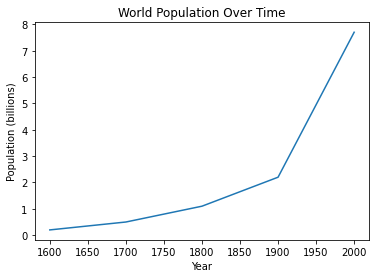

In [6]:
# creating a line plot using x and y coord
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
plt.plot(x, y)
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.show()

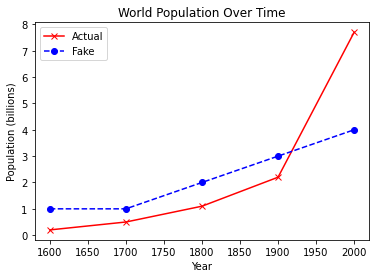

In [7]:
# creating a line plot with multiple lines
x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600, 1700, 1800, 1900, 2000], [1, 1, 2, 3, 4]
plt.plot(x1, y1, "rx-", label="Actual")
plt.plot(x1, y2, "bo--", label="Fake")
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.legend()
plt.show()


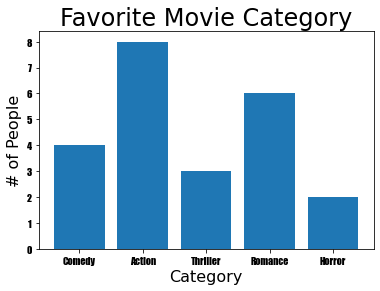

In [8]:
# creating a bar plot using x and y coords
num_people, categories = [4, 8, 3, 6, 2], ["Comedy", "Action", "Thriller", "Romance", "Horror"]
plt.bar(categories, num_people)
plt.title("Favorite Movie Category", fontsize=24)
plt.xlabel("Category", fontsize=16)
plt.ylabel("# of People", fontsize=16)
plt.xticks(fontname="Fantasy")
plt.yticks(fontname="Fantasy")
plt.show()

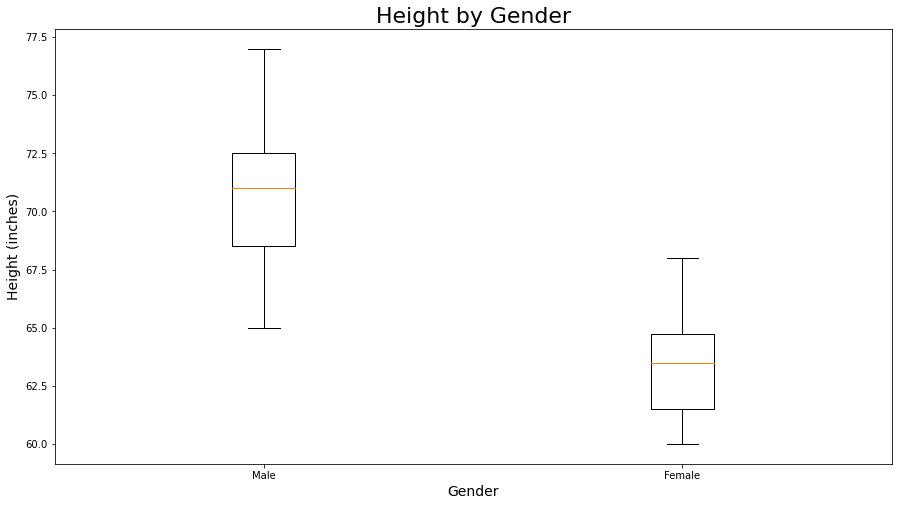

In [10]:
# creating a box plot - showing height data for male-female
males, females = [72, 68, 65, 77, 73, 71, 69], [60, 65, 68, 61, 63, 64]
heights = [males, females]
plt.figure(figsize=(15, 8))
plt.boxplot(heights)
plt.xticks([1, 2], ["Male", "Female"])
plt.title("Height by Gender", fontsize=22)
plt.ylabel("Height (inches)", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.show()

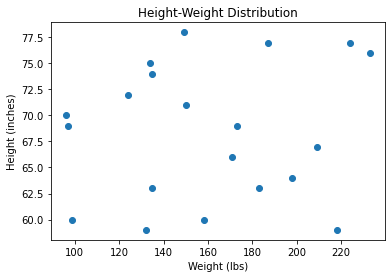

In [14]:
# creating a scatter plot to represent height-weight distribution
import random
from random import randint
random.seed(2)
height = [randint(58, 78) for x in range(20)]
weight = [randint(90, 250) for x in range(20)]
plt.scatter(weight, height)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.show()

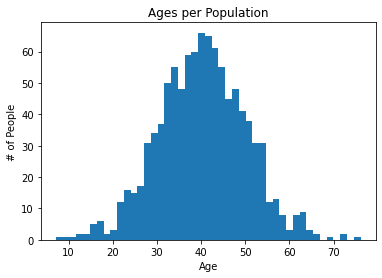

In [15]:
# creaing a histogram to show age data for a fake population
import numpy as np
np.random.seed(5)
ages = [np.random.normal(loc=40, scale=10) for x in range(1000)]
plt.hist(ages, bins=45)
plt.title("Ages per Population")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.show()

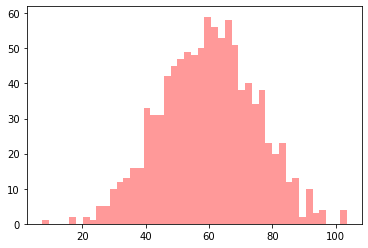

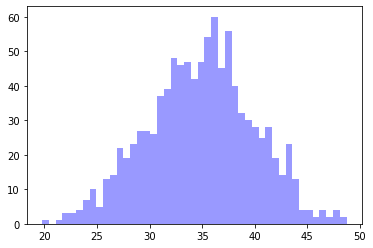

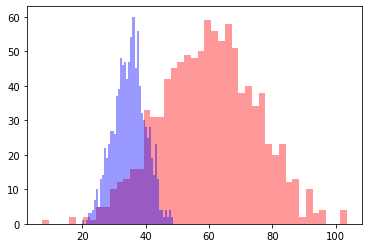

In [16]:
# showing the importance of histogram's to display central distribution

florida = [ np.random.normal(loc=60, scale=15) for x in range(1000) ]
california = [ np.random.normal(loc=35, scale=5) for x in range(1000) ]

# chart 1
plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.show()

# chart 2
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.show()


# chart 3
plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.savefig('figure10-7.jpg')
plt.show()

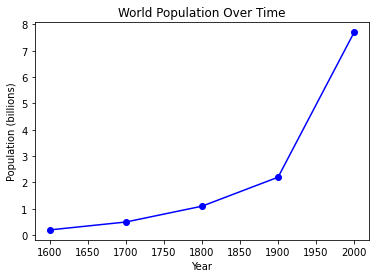

In [17]:
# using savefig method to save the chart as a jpg to the local folder
x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x, y, 'bo-')    # creates the line

plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')

plt.savefig("population.jpg")

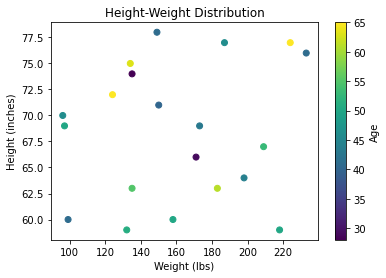

In [18]:
# creating a scatter plot to represent height-weight distribution
from random import randint
random.seed(2)

height = [ randint(58, 78) for x in range(20) ]   # 20 records between 4'10" and 6'8"
weight = [ randint(90, 250) for x in range(20) ]  # 20 records between 90lbs. and 250lbs.
age = [ randint(18, 65) for x in range(20) ]      # 20 records between 18 and 65 years old

plt.scatter(weight, height, c=age)

plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label="Age")      # adds color bar to right side

plt.show()

# Web Scraping

In [1]:
# importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

In [2]:
# performing a request and outputting the status code
page = requests.get("http://www.arthurleej.com/e-love.html")
print(page)

<Response [200]>


In [3]:
# outputting teh request response content
print(page.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="#00

In [4]:
# turing the response into a BeautifulSoup object to extract data
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

In [5]:
# using the find method to scrape the text within the first bold tag
title = soup.find("b")
print(title)
print(title.get_text())

<b>Love</b>
Love


In [6]:
# get all text within the bold element tag then output each
poem_text = soup.find_all("b")
for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

In [8]:
# finding an element by specific attribute key-values
page = requests.get('https://github.com/Connor-SM')

soup = BeautifulSoup(page.content, 'html.parser')

username = soup.find('span', attrs={ 'class' : 'vcard-username' })   # find first span with this class

print(username)   # will show that element has class of vcard-username among others
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">
          Connor-SM

        </span>

          Connor-SM

        


In [10]:
# traversing through the DOM using Beautiful Soup - using the children attribute
page = requests.get("http://www.arthurleej.com/e-love.html")
soup = BeautifulSoup(page.content, "html.parser")
print(soup.children)

In [11]:
# understanding the children within the soup object
for child in list(soup.children):
    print(type(child))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [12]:
# accessing the .Tag object which holds the html - trying to access the title tag
html = list(soup.children)[2]
for section in html:
    print("\n\nStart of new section")
    print(section)



Start of new section
 


Start of new section
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


Start of new section
 


Start of new section
<body alink="#33CC33" background="images/background1a.jpg" bg

In [15]:
# accessing the head element using the children attribute
head = list(html.children)[1]
for item in head:
    print("\n\nNew Tag")
    print(item)



New Tag
 


New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


New Tag
 


New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


New Tag
 


New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


New Tag
 


New Tag
<meta content="document" name="resource-type"/>


New Tag
 


New Tag
<meta content="BBEdit 4.5" name="generator"/>


New Tag
 


New Tag
<meta content="all" name="robots"/>


New Tag
 


New Tag
<meta content="Gardening" name="classification"/>


New Tag
 


New Tag
<meta content="global" name="distribution"/>


New Tag
 


New Tag
<meta content="general" name="rating"/>


New Tag
 


New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


New Tag
 


New Tag
<meta content="eriktyme@

In [16]:
# scraping the title text
title = list(head)[1]
print(title.string)
print(type(title.string))
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


# Friday Project: Website Analysis

In [ ]:
# import all necessary libraries
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

Enter a website to analyze: https://twitter.com/home
The top word is: JavaScript


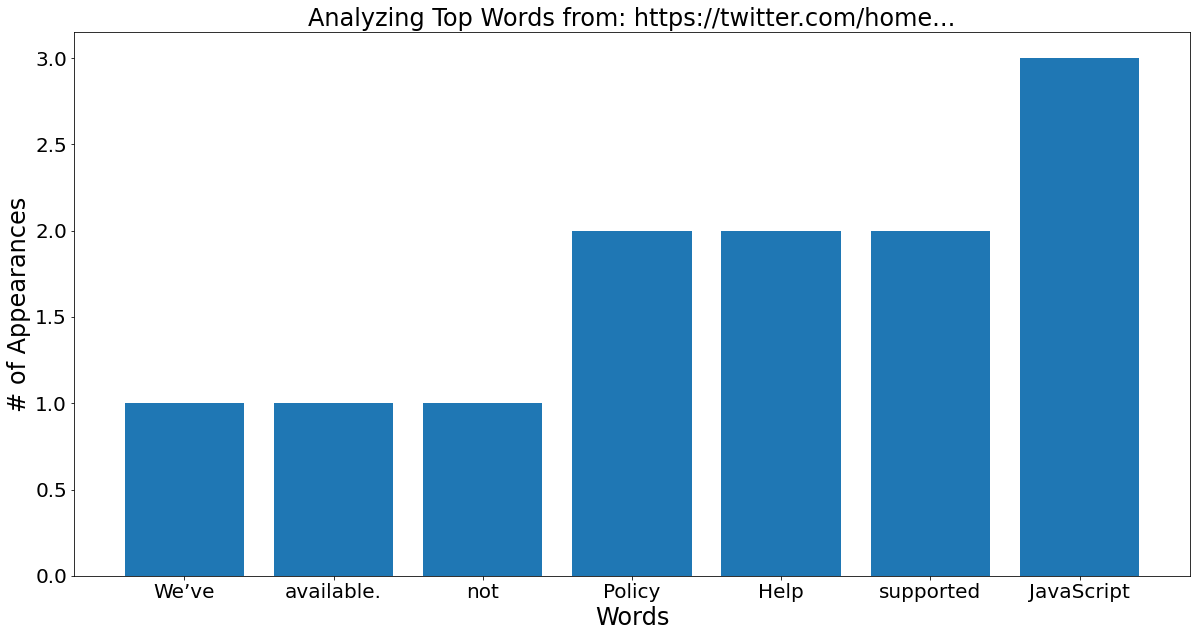

Would you like to scrape a website (y/n)?n
Thanks for analyzing! Come back again!


In [46]:
# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]
    word = [item[0] for item in words][::-1]
    
    plt.figure(figsize=(20, 10))
    
    plt.bar(word, count)
    
    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    plt.show()
    
# filter article words and hidden characters
def filterWaste(word):
    bad_words = ('the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 
                 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his')
    if word.lower() in bad_words:
        return False
    else:
        return True
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ["style", "script", "head", "title", "meta", "[document]"]:
        return False
    
    if isinstance(element, Comment):
        return False
 
    return True
    
# request site and return top 7 most used words
def scrape(site):
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    text = soup.find_all(text=True)
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    for text in visible_text:
        words = text.replace("\n", "").replace("\t", "").split(" ")
        
        words = list(filter(filterWaste, words))
        
        for word in words:
            if word != "":
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                    
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)
    
    return word_count[:7]

# main loop should ask if user wants to scrape, then what site to scrape
while input("Would you like to scrape a website (y/n)?") == "y":
    try:
        clear_output()
        
        site = input("Enter a website to analyze: ")
        
        top_words = scrape(site)
        
        top_word = top_words[0]
        
        print("The top word is: {}".format(top_word[0]))
        
        displayResults(top_words, site)
        
        scrape(site)
    except:
        print("Something went wrong, please try again.")
print("Thanks for analyzing! Come back again!")
